# Custom Training with YOLOv5 on HAM10000 Dataset

# Step 1: Install Requirements

In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 14424, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 14424 (delta 15), reused 24 (delta 9), pack-reused 14379
Receiving objects: 100% (14424/14424), 13.35 MiB | 12.92 MiB/s, done.
Resolving deltas: 100% (9966/9966), done.
/content/yolov5
     |████████████████████████████████| 1.6 MB 15.3 MB/s 
     |████████████████████████████████| 145 kB 18.3 MB/s 
     |████████████████████████████████| 178 kB 60.0 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 138 kB 55.0 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


# Custom dataset

HAM10000 from: https://dataverse.harvard.edu/file.xhtml?fileId=4338392&version=3.0

In [2]:
import os

# set up folders environment
datasets = '/content/datasets'
dataset_path = '/content/datasets/HAM10000'
labels_path = dataset_path + "/labels"
images_path = dataset_path + "/images"

if os.path.exists(datasets) is False:
  os.mkdir(datasets)

if os.path.exists(dataset_path) is False:
  os.mkdir(dataset_path)

# set up environment
os.environ["DATASET_DIRECTORY"] = dataset_path

## Upload files


Upload files to /content/datasets/HAM10000
- images.zip
- labels.zip
- test.zip
- HAM10000_data.yaml

Wait for the upload to finish before running the next cell. It might take a few minutes depending on the images.zip filesize.

In [3]:
# after uploading the files
!unzip -qq /content/datasets/HAM10000/labels.zip -d /content/datasets/HAM10000
!unzip -qq /content/datasets/HAM10000/images.zip -d /content/datasets/HAM10000
!unzip -qq /content/datasets/HAM10000/test.zip -d /content/datasets/HAM10000

**IMPORTANT:** Wait for the unzipping, it might take a few minutes. Do not run the following cell until it is done, you can check the folders under `content/datasets/HAM10000`.

# Step 3: Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location` (/content/datasets/HAM10000)
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

In [4]:
# currently running on the small model yolov5s.pt

!python train.py --img 450 --batch 16 --epochs 150 --data /content/datasets/HAM10000/HAM10000_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/HAM10000/HAM10000_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=450, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-211-g32a9218 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, h

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test` folder.

In [5]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source /content/datasets/HAM10000/test

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/HAM10000/test, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-211-g32a9218 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
image 1/30 /content/datasets/HAM10000/test/ISIC_0029264.jpg: 320x416 1 melanocytic nevi (nv), 13.7ms
image 2/30 /content/datasets/HAM10000/test/ISIC_0029265.jpg: 320x416 1 melanoma (mel), 1 benign keratosis-like lesions (bkl), 8.8ms
image 3/30 /content/datasets/HAM10000/test/ISIC_0029266.jpg: 320x416 1 melanocytic nevi (nv), 9.3ms
im

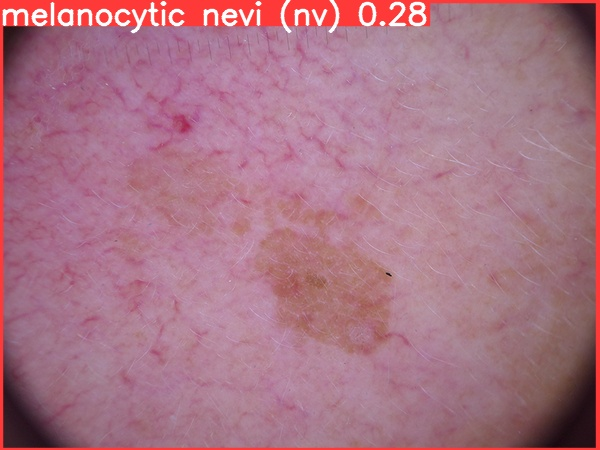

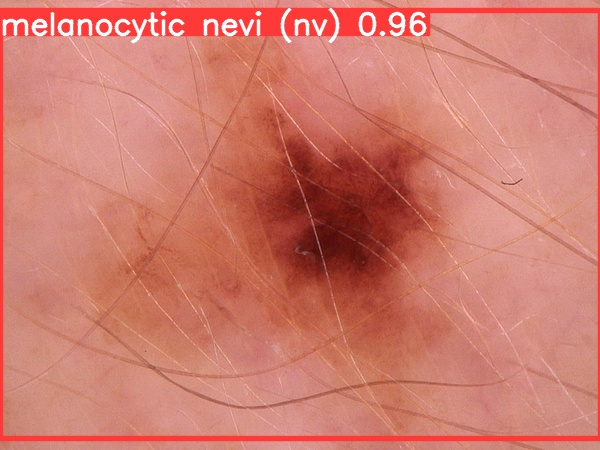

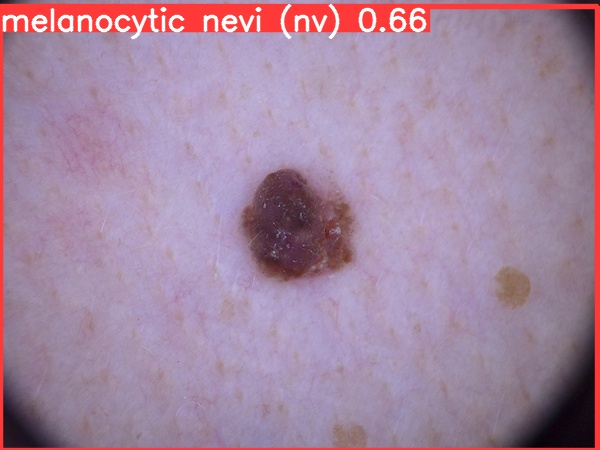

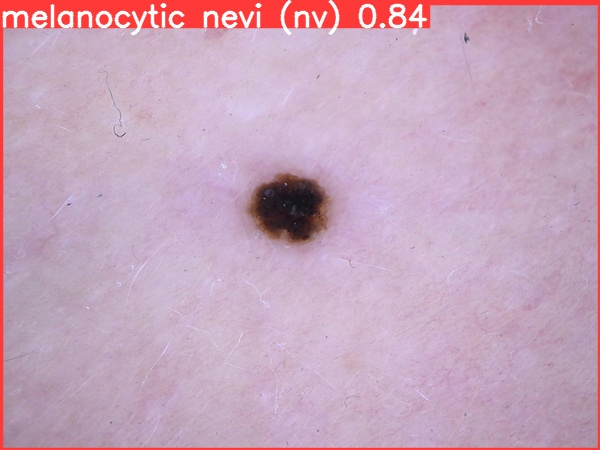

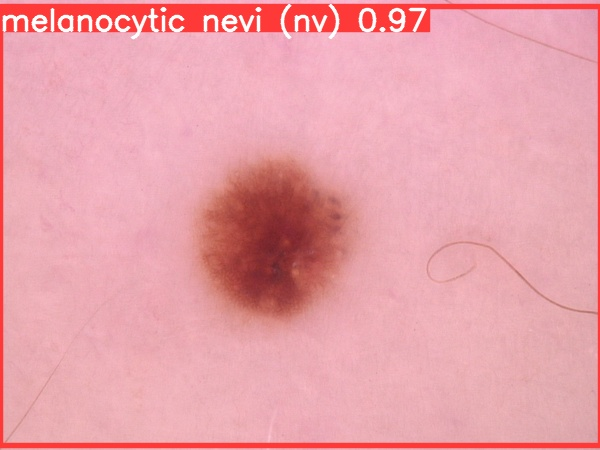

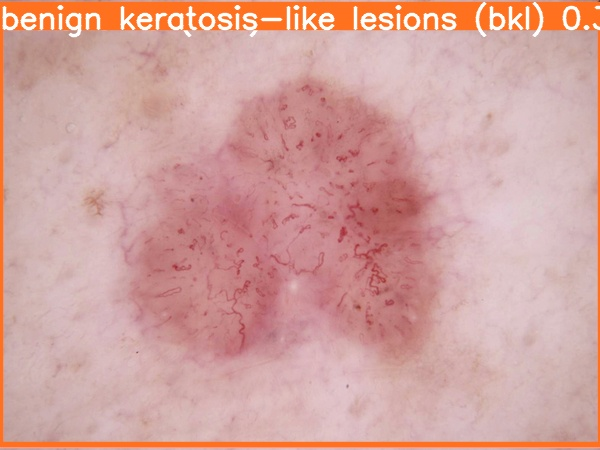

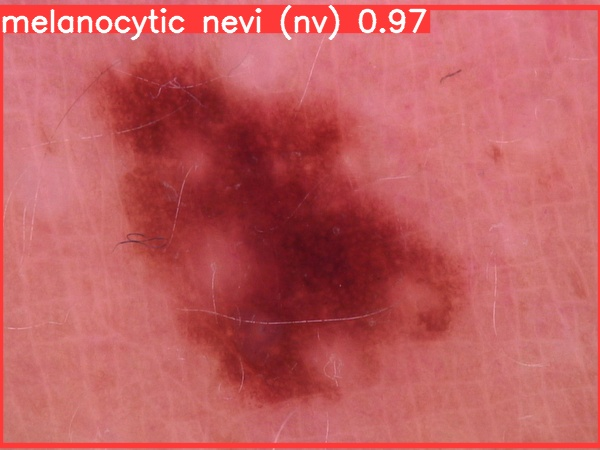

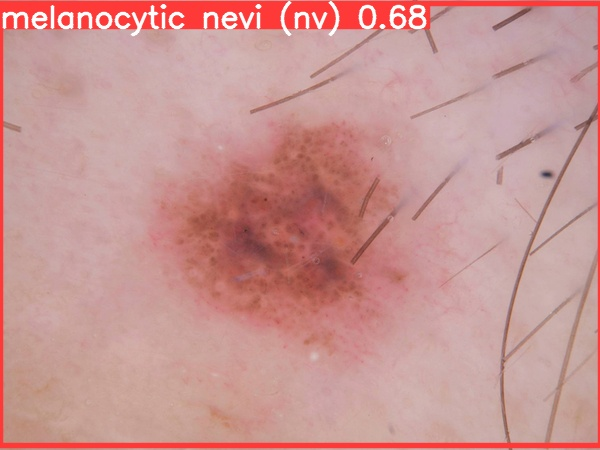

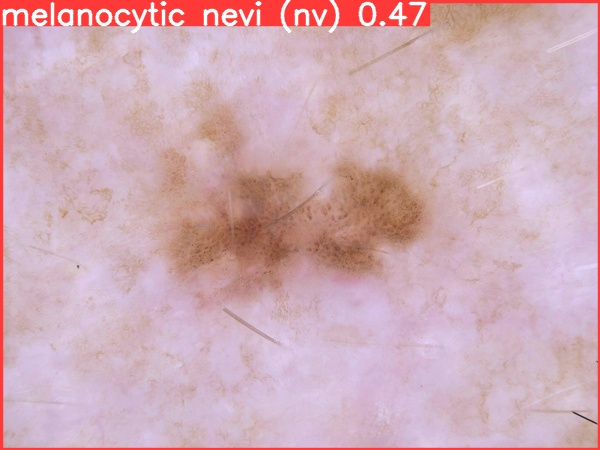

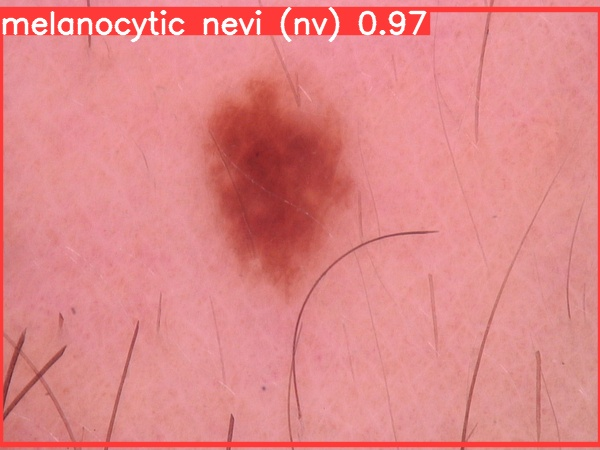

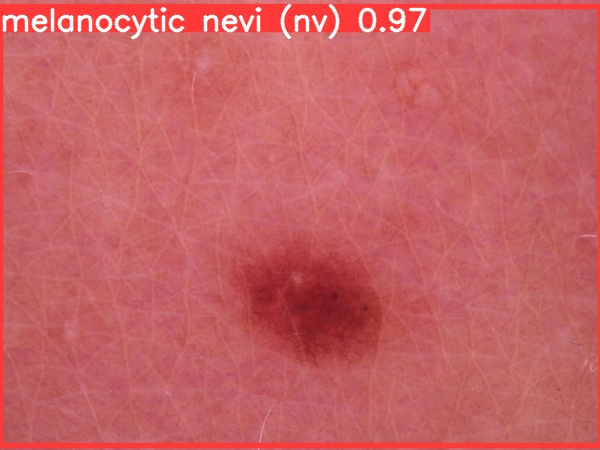

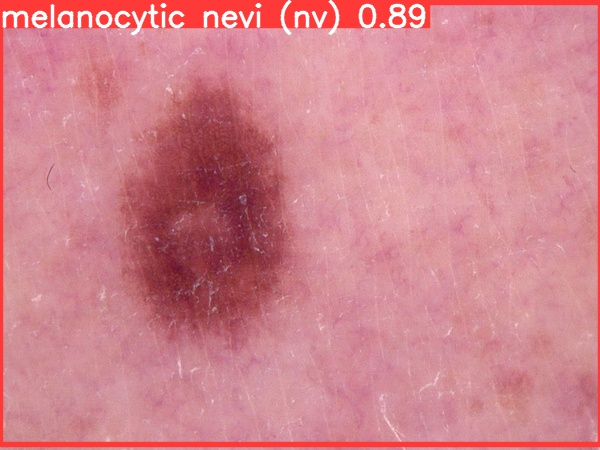

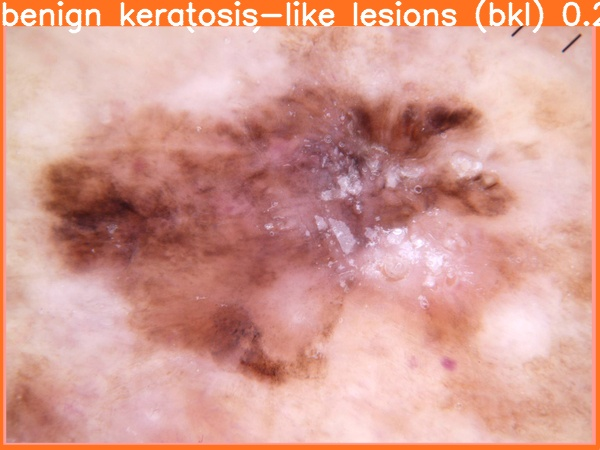

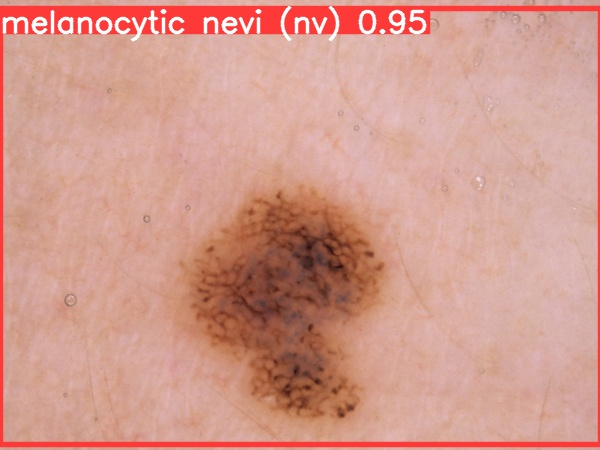

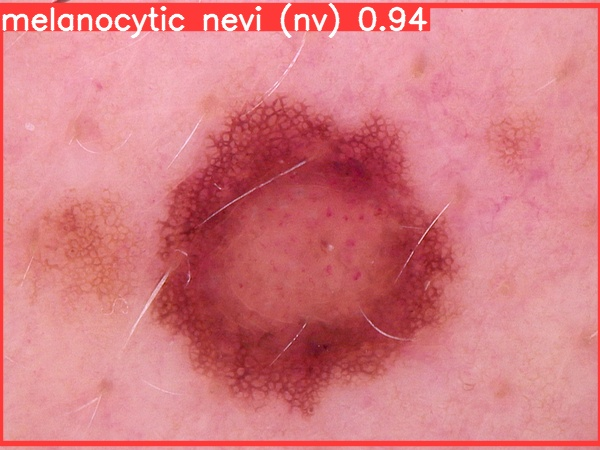

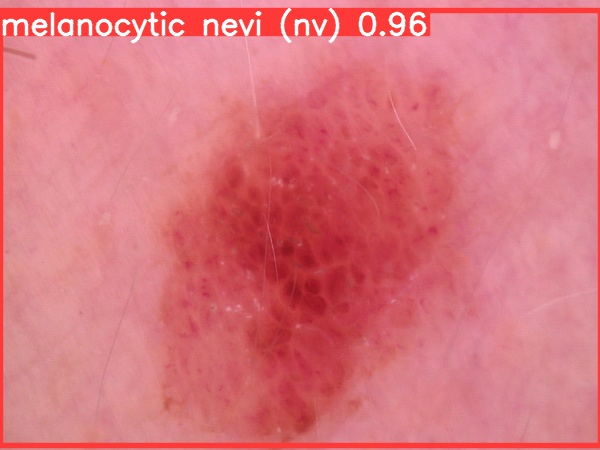

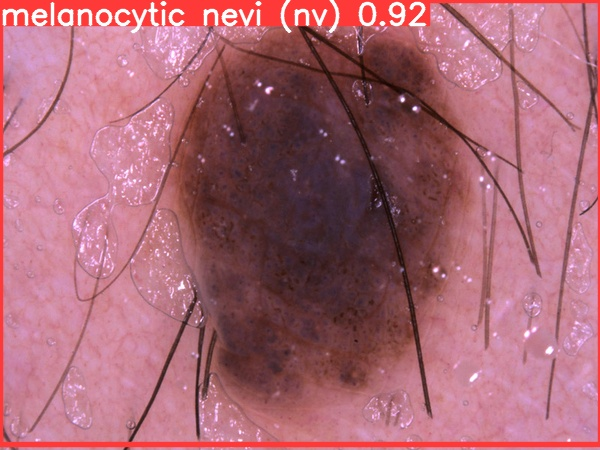

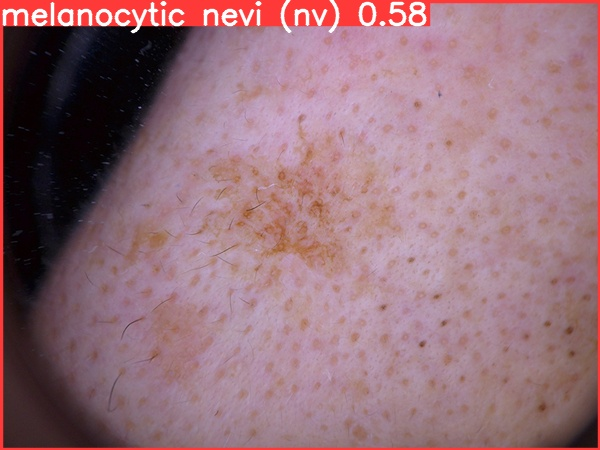

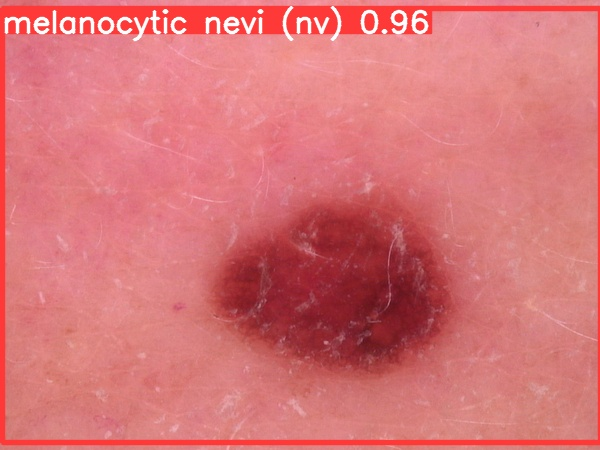

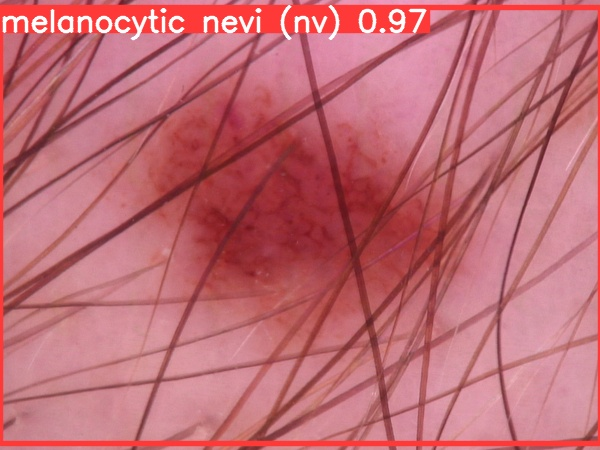

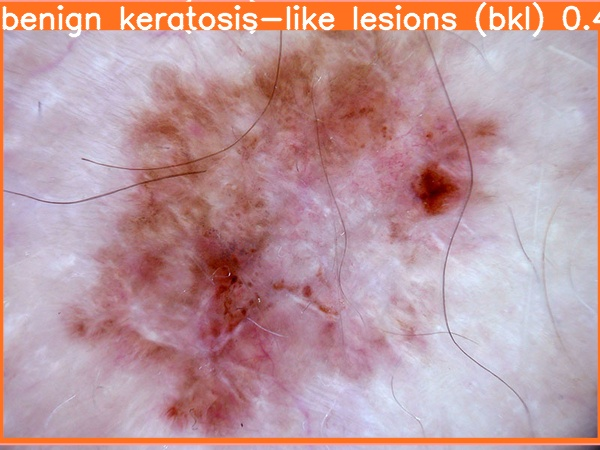

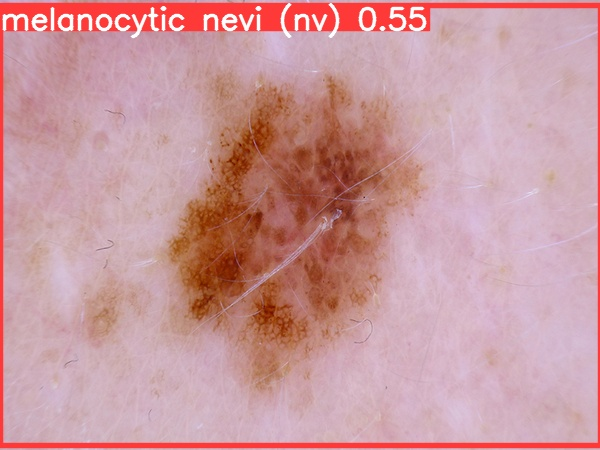

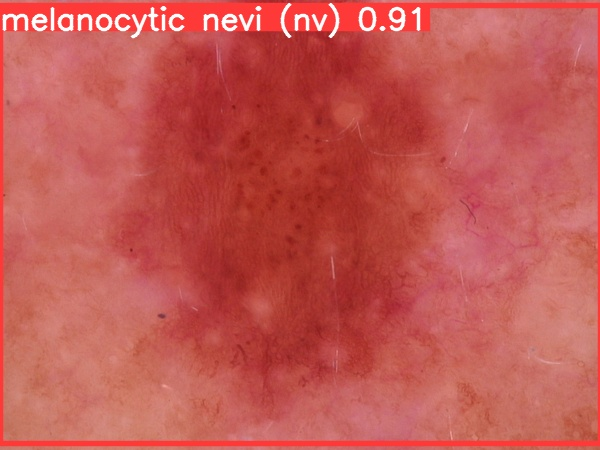

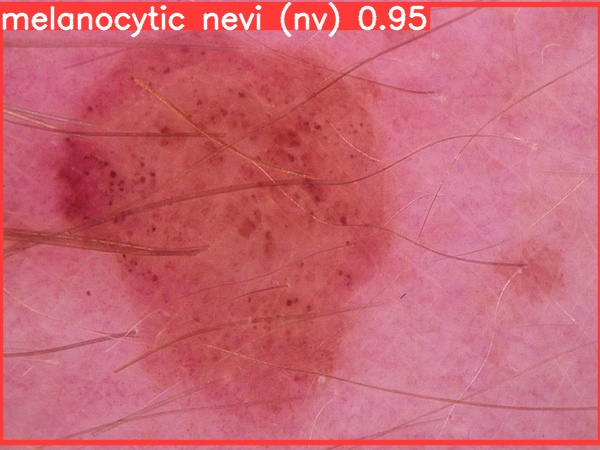

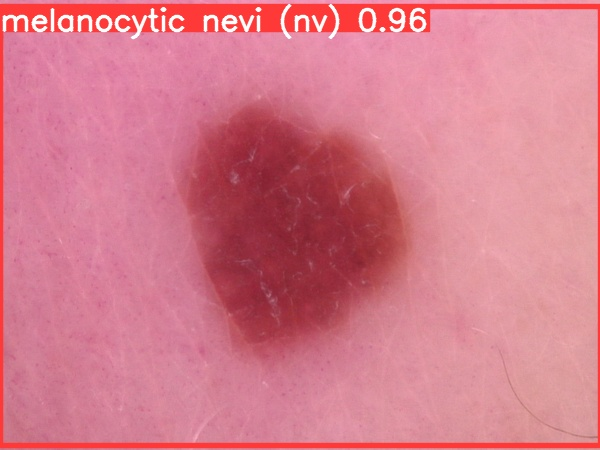

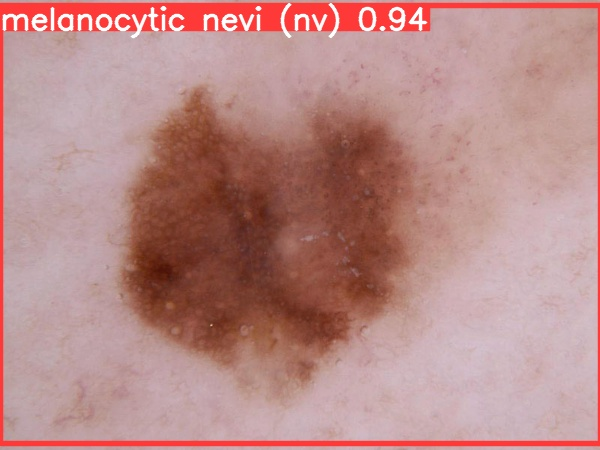

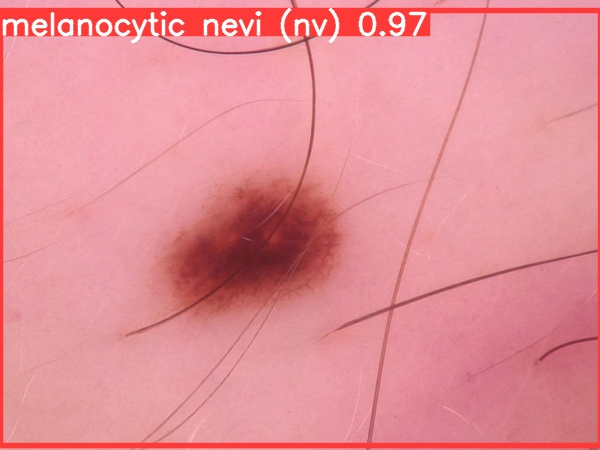

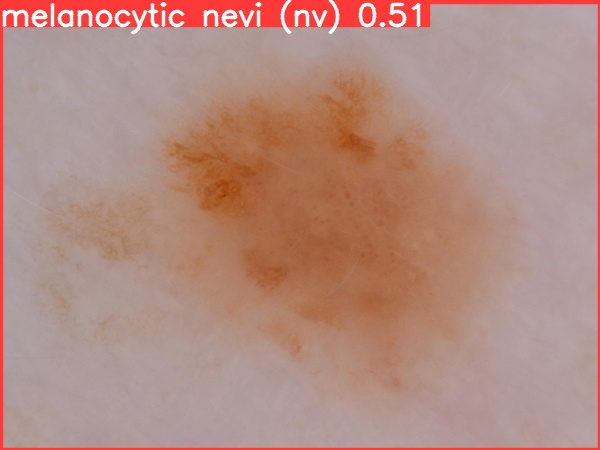

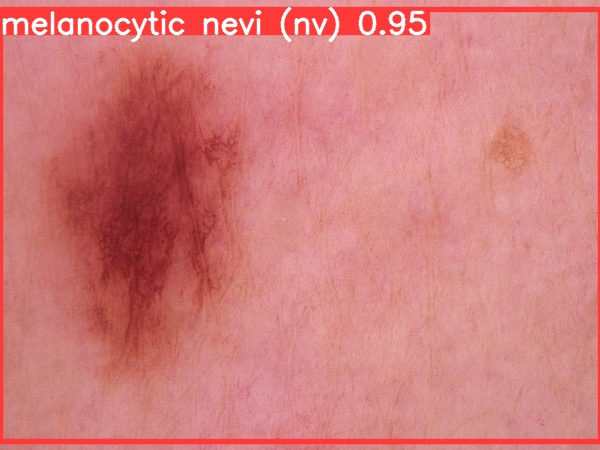

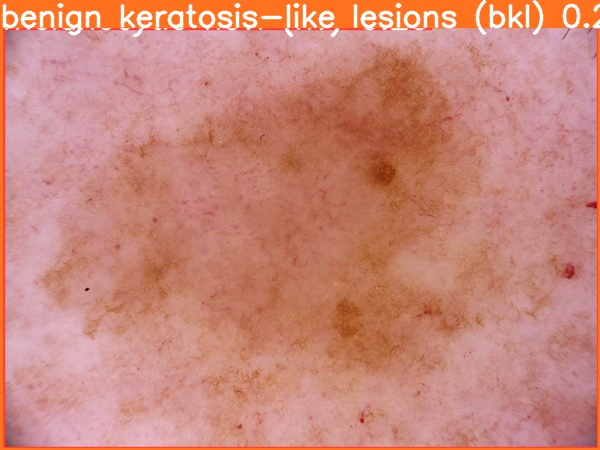

In [6]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Export

In [7]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
# export model to onnx format
!python export.py --weights runs/train/exp/weights/best.pt --include onnx

export: data=data/coco128.yaml, weights=['runs/train/exp/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v6.2-211-g32a9218 Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp/weights/best.pt with output shape (1, 25200, 12) (13.7 MB)

ONNX: starting export with onnx 1.12.0...
ONNX: export success ✅ 2.8s, saved as runs/train/exp/weights/best.onnx (27.2 MB)

Export complete (3.7s)
Results saved to /content/yolov5/runs/train/exp/weights
Detect:          python detect.py --weights runs/train/exp/weights/best.onnx 
Validate:        python val.py --weights runs/train/exp/weights/best.onnx 
PyTorch Hub:     m

Onnx file saved under `/content/yolov5/runs/train/exp/weights`.